In [200]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
from collections import Counter

In [201]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

print("Size of training data:", train.shape)
print("Size of testing data:", test.shape)

train.head()

Size of training data: (39774, 3)
Size of testing data: (9944, 2)


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [202]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [203]:
print('Maximum Number of Ingredients in a recipe: ',train['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a recipe: ',train['ingredients'].str.len().min())

Maximum Number of Ingredients in a recipe:  65
Minimum Number of Ingredients in a recipe:  1


romaine lettuce           270
black olives              229
grape tomatoes            228
garlic                   7380
pepper                   4438
purple onion             1896
seasoning                 137
garbanzo beans            148
feta cheese crumbles      358
plain flour               154
ground pepper             385
salt                    18049
tomatoes                 3058
ground black pepper      4785
thyme                     361
eggs                     3388
green tomatoes            108
yellow corn meal          341
milk                     2263
vegetable oil            4385
dtype: int64


Text(0, 0.5, 'Ingredients')

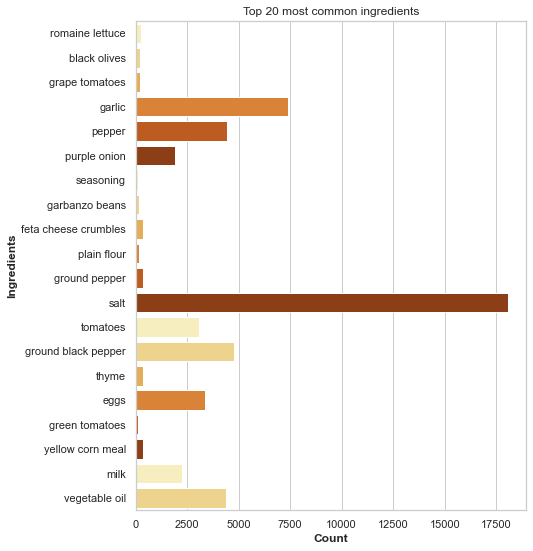

In [204]:
ingredients_list = Counter([item for ingredients in train['ingredients'] for item in ingredients])
print(top_20_ingredients)


plt.figure(figsize = (7,9))
clrs = sns.color_palette("YlOrBr")
sns.barplot( x = top_20_ingredients, y = top_20_ingredients.index, palette = clrs)
plt.title('Top 20 most common ingredients')
plt.xlabel('Count', fontweight ='bold')
plt.ylabel('Ingredients', fontweight ='bold')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'italian'),
  Text(1, 0, 'mexican'),
  Text(2, 0, 'southern_us'),
  Text(3, 0, 'indian'),
  Text(4, 0, 'chinese'),
  Text(5, 0, 'french'),
  Text(6, 0, 'cajun_creole'),
  Text(7, 0, 'thai'),
  Text(8, 0, 'japanese'),
  Text(9, 0, 'greek'),
  Text(10, 0, 'spanish'),
  Text(11, 0, 'korean'),
  Text(12, 0, 'vietnamese'),
  Text(13, 0, 'moroccan'),
  Text(14, 0, 'british'),
  Text(15, 0, 'filipino'),
  Text(16, 0, 'irish'),
  Text(17, 0, 'jamaican'),
  Text(18, 0, 'russian'),
  Text(19, 0, 'brazilian')])

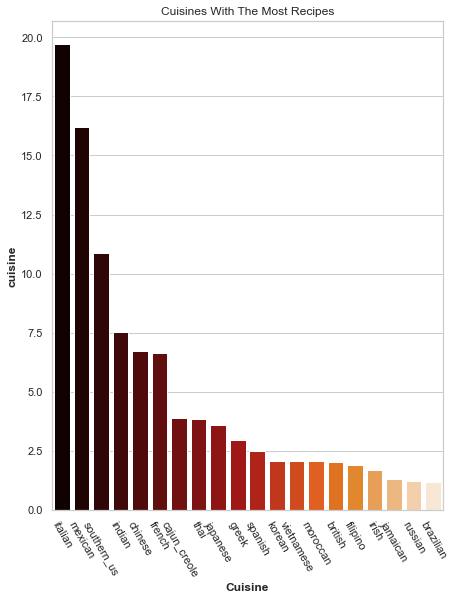

In [205]:
import warnings
warnings.filterwarnings('ignore')

temp = train['cuisine'].value_counts()
x = temp / temp.sum() * 100
y = temp.index
plt.figure(figsize = (7,9))

plt.title('Cuisines With The Most Recipes')
plt.xlabel('Cuisine', fontweight ='bold')
plt.ylabel('Recipe Count', fontweight ='bold')
sns.barplot(y, x, data = train, palette = "gist_heat")
plt.xticks(rotation = -60)

In [206]:
train['ing_count'] = train['ingredients'].str.len()

train[train['ing_count'] >= 60]

,id,cuisine,ingredients,ing_count
15289,3885,italian,"[fettucine, fresh marjoram, minced garlic, oli...",65


In [207]:
train[train['ing_count'] <= 1]

,id,cuisine,ingredients,ing_count
940,4734,japanese,[sushi rice],1
2088,7833,vietnamese,[dried rice noodles],1
6787,36818,indian,[plain low-fat yogurt],1
7011,19772,indian,[unsalted butter],1
8181,16116,japanese,[udon],1
8852,29738,thai,[sticky rice],1
8990,41124,indian,[butter],1
10506,32631,mexican,[corn tortillas],1
13178,29570,thai,[grained],1
17804,29849,southern_us,[lemonade concentrate],1
